# 주어진 데이터를 사용하여 키와 몸무개를 예측합니다.

## 단순 선형 회귀분석(1차함수)

### 데이터준비

In [2]:
import pandas as pd

filepath = './dataset/data.csv'
df = pd.read_csv(filepath)
height = df['Height']
weight = df['Weight']

height_list = []
weight_list = []

for h in height:
    height_list.append(h)

for w in weight:
    weight_list.append(w)

In [3]:
import numpy as np

height_array = np.array(height_list)
weight_array = np.array(weight_list)


In [4]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(
    height_array, weight_array, random_state=15)


In [5]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

### 데이터 시각화하기

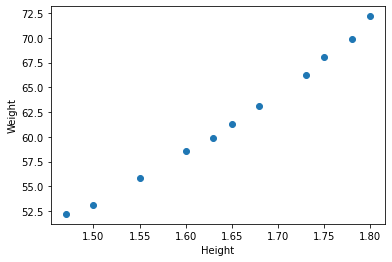

In [6]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

### 단순 선형회귀 모델을 훈련하기

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)
print(lr.score(test_input, test_target))

0.9859201510017104


98%라는 높은 정확도를 보여주었습니다. 이제 위 모델에서 훈련한 직선을 산점도 위에 그려보도록 하겠습니다.

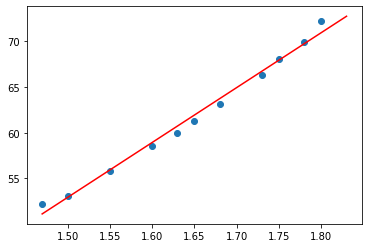

In [8]:
plt.scatter(train_input, train_target)
plt.plot([1.47, 1.83], [1.47*lr.coef_ + lr.intercept_, 1.83*lr.coef_+lr.intercept_], 'r')



## 다항회귀
하지만 위 그래프는 키가 0.6m 이하부터는 몸무개를 음수로 예측합니다. 왜나하면
위 일차함수 그래프의 y절편이 음수에 있기 때문입니다.

그리하여 우리는 1차함수 그래프가 아닌 데이터의 특성을 고려하여 2차함수
 그래프로 작성해보도록 하겠습니다.


In [15]:
# 키가 0.6 이하부터는 음수로 예측합니다.
print(lr.predict([[0.6]]))

[-1.04380459]


### 데이터 준비


In [16]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input **2 , test_input))

In [17]:
print(train_poly.shape, test_poly.shape)

(11, 2) (4, 2)


### 모델 훈련시키기

In [18]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
lr.score(test_poly, test_target)

0.9988947387669952


0.9986595379985445

### 훈련한 직선 시각화하기

In [19]:
print(lr.coef_, lr.intercept_)

[  61.01757452 -139.8618543 ] 125.88610143987034


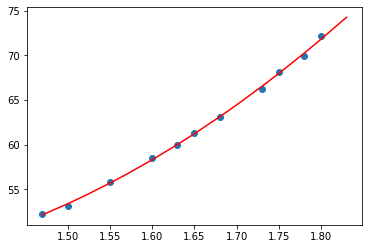

In [22]:
plt.scatter(train_input, train_target)
plt.plot(height_array, 61.01757452 * height_array **2 -139.8618543*height_array + 125.88610143987034, 'r')
plt.show()